In [25]:
# install packages
import sys
%time  !{sys.executable} -m pip install numpy==1.18.1
%time  !{sys.executable} -m pip install pandas==0.24.2
%time  !{sys.executable} -m pip install matplotlib==3.2.1
%time  !{sys.executable} -m pip install scikit-learn==0.23.1
%time  !{sys.executable} -m pip install datetime==4.3
%time  !{sys.executable} -m pip install argparse==1.4.0

CPU times: user 22.8 ms, sys: 16.3 ms, total: 39.2 ms
Wall time: 1.61 s
CPU times: user 21.3 ms, sys: 10.6 ms, total: 32 ms
Wall time: 1.56 s
CPU times: user 23.2 ms, sys: 12.1 ms, total: 35.2 ms
Wall time: 1.62 s
CPU times: user 23.4 ms, sys: 15 ms, total: 38.4 ms
Wall time: 1.62 s
CPU times: user 24.3 ms, sys: 11.7 ms, total: 36 ms
Wall time: 1.66 s
CPU times: user 20.7 ms, sys: 10.1 ms, total: 30.8 ms
Wall time: 1.54 s


In [26]:
# method 1 to install 'torch'
%time  !{sys.executable} -m pip install torch==1.0.1

CPU times: user 22.1 ms, sys: 15.4 ms, total: 37.5 ms
Wall time: 1.55 s


In [27]:
#import necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import json

import os
import datetime
import requests
import urllib.request
import time
import re
import zipfile as zp

from sklearn import model_selection
from torch.utils.data import Dataset, DataLoader
from bs4 import BeautifulSoup
from datetime import date

In [28]:
#targeted communities in LA County
target = ['Alhambra', 'Arcadia', 'Beverly Hills', 'Boyle Heights', 'Carson', 'Diamond Bar', 'Encino', 'Gardena', 'Glendale', 'Glendora',
          'Granada Hills', 'Inglewood', 'La Mirada', 'Lancaster', 'Manhattan Beach', 'Melrose', 'Northridge', 'San Dimas', 'San Pedro',
          'Santa Monica', 'Sherman Oaks', 'Silver Lake', 'Tarzana', 'Torrance', 'Venice', 'West Adams', 'West Hills', 'West Hollywood',
          'West Vernon', 'Westchester', 'Altadena', 'Baldwin Hills', 'Brentwood', 'Culver City', 'Eagle Rock', 'Hollywood',
          'Hollywood Hills', 'Lynwood', 'Mar Vista', 'Monterey Park', 'North Hollywood', 'Reseda', 'Santa Clarita', 'Woodland Hills',
          'Sylmar', 'Walnut', 'Beverlywood', 'Burbank', 'Calabasas', 'Castaic', 'Covina', 'Crestview', 'East Los Angeles', 'Echo Park', 
          'Hancock Park', 'Hawthorne', 'Lawndale', 'Lomita', 'Palms', 'Playa Vista', 'South El Monte', 'Stevenson Ranch', 'Studio City',
          'Tujunga', 'University Park', 'Valley Glen', 'Van Nuys', 'Vermont Knolls', 'Westwood', 'Whittier', 'Century City', 'El Segundo',
          'Lake Balboa', 'Lakewood', 'Miracle Mile', 'Park La Brea', 'Redondo Beach', 'San Fernando', 'South Whittier', 'Winnetka', 
          'Del Rey', 'La Canada Flintridge', 'La Verne', 'Montebello', 'Sun Valley', 'Sunland', 'Vermont Vista', 'Vernon Central',
          'West Covina', 'Westlake', 'Bellflower', 'Canoga Park', 'East Hollywood', 'Los Feliz', 'Paramount', 'Rancho Palos Verdes', 
          'South Gate', 'Agoura Hills', 'Duarte', 'Exposition Park', 'Hyde Park', 'Lincoln Heights', 'Palmdale', 'South Park',
          'Wilshire Center', 'Canyon Country', 'Claremont', 'Downey', 'Harbor Gateway', 'Harvard Heights', 'Highland Park', 
          'La Puente', 'Norwalk', 'Pico Rivera', 'Porter Ranch', 'San Gabriel', 'Wholesale District', 'Willowbrook', 'Arleta',
          'Bell Gardens', 'Glassell Park', 'Panorama City', 'Pomona', 'Valinda', 'Watts', 'Azusa', 'Bell', 'Chatsworth', 
          'Hacienda Heights', 'Harbor City', 'Leimert Park', 'Maywood', 'Monrovia', 'North Hills', 'Pacoima', 'Avalon', 'Baldwin Park',
          'Bassett', 'Central', 'El Monte', 'El Sereno', 'Harvard Park', 'Lake Los Angeles', 'Rosemead', 'Rowland Heights', 'Temple City',
          'Acton', 'Cerritos', 'Cloverdale/Cochran', 'Compton', 'Downtown', 'Huntington Park', 'Koreatown', 'Mt. Washington', 'Pasadena', 
          'South Pasadena', 'Wilmington']

In [29]:
def get_confirmed_cases_LA():
    #Read the data from the source
    url="https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/latimes-place-totals.csv"
    df = pd.read_csv(url,header=0)
    df = df[df['county']=='Los Angeles'][['date','place','confirmed_cases']]
    df = df[df['place'].isin(target)]
    
    # Change format
    result = df.copy()
    result['place'].replace('Silver Lake','Silverlake',inplace = True)
    result['date'] = pd.to_datetime(result['date'])
    
    result = result.sort_values(by=['place','date'])
    result['new_confirmed_cases'] = result['confirmed_cases']
    result['ave_new7_10after'] = result['confirmed_cases']
    result['ave_new6_9after'] = result['confirmed_cases']
    result['ave_new8_11after'] = result['confirmed_cases']
    result.iloc[0,3] = None
    return result

def read_case_LA():
    result = get_confirmed_cases_LA()
    for i in range(1,len(result)):    
        if i < (len(result)-11):
            if result.iloc[i,1] == result.iloc[(i+11),1]:
                result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3] + result.iloc[(i+10),3])/4.0
                result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/4.0
                result.iloc[i,6] = (result.iloc[(i+8),3] + result.iloc[(i+9),3] + result.iloc[(i+10),3] + result.iloc[(i+11),3])/4.0
            elif result.iloc[i,1] == result.iloc[(i+10),1]:
                result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3] + result.iloc[(i+10),3])/4.0
                result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/4.0
                result.iloc[i,6] = (result.iloc[(i+8),3] + result.iloc[(i+9),3] + result.iloc[(i+10),3])/3.0
            elif result.iloc[i,1] == result.iloc[(i+9),1]:
                result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/3.0
                result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/4.0
                result.iloc[i,6] = (result.iloc[(i+8),3] + result.iloc[(i+9),3])/2.0
            elif result.iloc[i,1] == result.iloc[(i+8),1]:
                result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3])/2.0
                result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3])/3.0
                result.iloc[i,6] = result.iloc[(i+8),3]
            elif result.iloc[i,1] == result.iloc[(i+7),1]:
                result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3])/2.0
                result.iloc[i,6] = result.iloc[i,4] = result.iloc[(i+7),3]
            else:
                for j in range(8):
                    if result.iloc[i,1] == result.iloc[(i+7-j),1]:
                        result.iloc[i,4] = result.iloc[i,5] = result.iloc[i,6] = result.iloc[(i+7-j),3]
                        break
        else:
            if i < (len(result)-10):
                result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3] + result.iloc[(i+10),3])/4.0
                result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/4.0
                result.iloc[i,6] = (result.iloc[(i+8),3] + result.iloc[(i+9),3] + result.iloc[(i+10),3])/3.0
            elif i < (len(result)-9):
                result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/3.0
                result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3] + result.iloc[(i+9),3])/4.0
                result.iloc[i,6] = (result.iloc[(i+8),3] + result.iloc[(i+9),3])/2.0
            elif i < (len(result)-8):
                result.iloc[i,4] = (result.iloc[(i+7),3] + result.iloc[(i+8),3])/2.0
                result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3] + result.iloc[(i+8),3])/3.0
                result.iloc[i,6] = result.iloc[(i+8),3]
            elif i < (len(result)-7):
                result.iloc[i,5] = (result.iloc[(i+6),3] + result.iloc[(i+7),3])/2.0
                result.iloc[i,6] = result.iloc[i,4] = result.iloc[(i+7),3]
            else:          
                result.iloc[i,4] = result.iloc[i,5] = result.iloc[i,6] = result.iloc[-1,3]
    result.dropna(inplace = True)
    return result

In [30]:
#date to string
from datetime import date
today = date.today()
d = today.strftime("%m-%d-%Y")

In [31]:
def get_apple_link():
    '''Get link of Apple Mobility Trends report file
    
       Returns:
           link (str): link of Apple Mobility Trends report file
    '''
    # get link via API
    json_link = "https://covid19-static.cdn-apple.com/covid19-mobility-data/current/v3/index.json"
    with urllib.request.urlopen(json_link) as url:
        json_data = json.loads(url.read().decode())
    link = "https://covid19-static.cdn-apple.com" + \
        json_data['basePath'] + json_data['regions']['en-us']['csvPath']
    return link

def download_apple_report(directory="apple_reports"):
    '''Download Apple Mobility Trends report in CSV

        Args:
            directory: directory to which CSV report will be downloaded

        Returns:
            new_files (bool): flag indicating whether or not a new file has been downloaded
    '''
    new_files = False
    
    # create directory if it don't exist
    if not os.path.exists(directory) and directory!='':
        os.makedirs(directory)
    
    link = get_apple_link()
    file_name = "applemobilitytrends.csv"
    path = os.path.join(directory, file_name)
    path = os.path.join(directory, file_name)
    old_size = os.path.getsize(path) if os.path.isfile(path) else 0
    urllib.request.urlretrieve(link, path)
    new_size = os.path.getsize(path)
    if old_size!=new_size:
        new_files = True

    if not new_files:
        print('Apple: No updates')
    else:
        print('Apple: Update available')
    
    return new_files

def build_apple_report(
    source=os.path.join(
        'apple_reports',
        "applemobilitytrends.csv"),
        report_type="regions"):
    '''Build cleaned Apple report (transform dates from columns to rows, add country names for subregions and cities)
       for the worldwide or for some country (currently only for the US)

        Args:
            source: location of the raw Apple CSV report
            destination: destination file path
            report_type: two options available: "regions" - report for the worldwide, "US" - report for the US

        Returns:
           apple (DataFrame): generated Apple report
    '''
    apple = pd.read_csv(source)
    apple = apple.drop(columns=['alternative_name'])
    apple['country'] = apple.apply(
        lambda x: x['region'] if x['geo_type'] == 'country/region' else x['country'],
        axis=1)

    if report_type == 'regions':
        apple = apple[apple.geo_type != 'county']
        apple['sub-region'] = apple.apply(lambda x: 'Total' if x['geo_type'] == 'country/region' else (
            x['region'] if x['geo_type'] == 'sub-region' else x['sub-region']), axis=1)
        apple['subregion_and_city'] = apple.apply(
            lambda x: 'Total' if x['geo_type'] == 'country/region' else x['region'], axis=1)
        apple = apple.drop(columns=['region'])
        apple['sub-region'] = apple['sub-region'].fillna(
            apple['subregion_and_city'])

        apple = apple.melt(
            id_vars=[
                'geo_type',
                'subregion_and_city',
                'sub-region',
                'transportation_type',
                'country'],
            var_name='date')
        apple['value'] = apple['value'] - 100

        apple = apple.pivot_table(
            index=[
                "geo_type",
                "subregion_and_city",
                "sub-region",
                "date",
                "country"],
            columns='transportation_type').reset_index()
        apple.columns = [t + (v if v != "value" else "")
                         for v, t in apple.columns]
        apple = apple.loc[:,
                          ['country',
                           'sub-region',
                           'subregion_and_city',
                           'geo_type',
                           'date',
                           'driving',
                           'transit',
                           'walking']]
        apple = apple.sort_values(by=['country',
                                      'sub-region',
                                      'subregion_and_city',
                                      'date']).reset_index(drop=True)
    elif report_type == "US":
        apple = apple[apple.country == "United States"].drop(columns=[
                                                             'country'])
        apple['sub-region'] = apple['sub-region'].fillna(
            apple['region']).replace({"United States": "Total"})
        apple['region'] = apple.apply(lambda x: x['region'] if (
            x['geo_type'] == 'city' or x['geo_type'] == 'county') else 'Total', axis=1)
        apple = apple.rename(
            columns={
                'sub-region': 'state',
                'region': 'county_and_city'})

        apple = apple.melt(
            id_vars=[
                'geo_type',
                'state',
                'county_and_city',
                'transportation_type'],
            var_name='date')
        apple['value'] = apple['value'] - 100

        apple = apple.pivot_table(
            index=[
                'geo_type',
                'state',
                'county_and_city',
                'date'],
            columns='transportation_type').reset_index()
        apple.columns = [t + (v if v != "value" else "")
                         for v, t in apple.columns]

        apple = apple.loc[:, ['state', 'county_and_city', 'geo_type',
                              'date', 'driving', 'transit', 'walking']]
        apple = apple.sort_values(
            by=['state', 'county_and_city', 'geo_type', 'date']).reset_index(drop=True)
    return apple

def read_apple_LA():
    new_files_status_apple = download_apple_report()
    apple_mobility = build_apple_report(report_type="US")
    apple_mobility = apple_mobility[apple_mobility['county_and_city']=='Los Angeles']
    apple_mobility['driving'] = apple_mobility['driving']+100
    apple_mobility['transit'] = apple_mobility['transit']+100
    apple_mobility['walking'] = apple_mobility['walking']+100
    apple_mobility = apple_mobility[['date','driving','transit','walking']]
    apple_mobility['date'] = pd.to_datetime(apple_mobility['date'])
    return apple_mobility

# Read google Mobility Data
def build_google_mobility():
    url3 = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=04188f017409e90a"
    google_mobility = pd.read_csv(url3)    
    return google_mobility

def read_google_LA():
    google_mobility = build_google_mobility()
    google_mobility = google_mobility[google_mobility['sub_region_2'] == 'Los Angeles County']
    gmobility = google_mobility[['date','retail_and_recreation_percent_change_from_baseline',
                       'grocery_and_pharmacy_percent_change_from_baseline',
                       'parks_percent_change_from_baseline',
                       'transit_stations_percent_change_from_baseline',
                       'workplaces_percent_change_from_baseline',
                       'residential_percent_change_from_baseline',]].copy()
    gmobility['date'] = pd.to_datetime(google_mobility['date'])
    return gmobility

In [32]:
# Read and Modify Econ Data
def read_econ_LA():
    url4 = "https://raw.githubusercontent.com/skasralikar/Risk-Score-1-UMichZJU/master/data/input/econ_level.csv"
    econ = pd.read_csv(url4, index_col = 0)
    econ.columns = ['place','Density_Per_Sq_Mile','population','Income_level']
    return econ

In [33]:
def merge_LA(result,amobility,gmobility,econ):
    # Merge Mobility Data
    final = result.merge(amobility,how = 'left',on = 'date')
    final_result = final.merge(gmobility,how = 'left',on = 'date')
    final_result.dropna(inplace = True)
    # Merge Econ Data
    final_results = final_result.merge(econ, how = 'left', on = 'place')
    
    # Change format
    final_results['ZIP'] = final_results['place']
    final_results['ZIP'].astype(str)
    final_results['date'].astype(str)
    return final_results

In [34]:
LA_cases = read_case_LA()
LA_amobility = read_apple_LA()
LA_gmobility = read_google_LA()
LA_econ = read_econ_LA()

final_results = merge_LA(LA_cases,LA_amobility,LA_gmobility,LA_econ)

LA_daily = final_results[['ZIP','date','confirmed_cases','new_confirmed_cases','population','Density_Per_Sq_Mile',
                              'Income_level','driving','transit',
                              'walking','retail_and_recreation_percent_change_from_baseline',
                              'grocery_and_pharmacy_percent_change_from_baseline',
                              'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
                              'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline',
                              'ave_new7_10after','ave_new6_9after','ave_new8_11after']]

LA_daily_predict = final_results[['ZIP','date','confirmed_cases','new_confirmed_cases','population','Density_Per_Sq_Mile',
                                      'Income_level','driving','transit','walking','retail_and_recreation_percent_change_from_baseline',
                                  'grocery_and_pharmacy_percent_change_from_baseline',
                                  'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
                                  'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline',
                                  'ave_new7_10after']]

Apple: Update available


In [35]:
LA_daily.head(10)

,ZIP,date,confirmed_cases,new_confirmed_cases,population,Density_Per_Sq_Mile,Income_level,driving,transit,walking,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,ave_new7_10after,ave_new6_9after,ave_new8_11after
0,Acton,2020-04-03,1,1.0,6522,166,2,52.04,26.30,52.60,-43.0,-15.0,-38.0,-51.0,-51.0,25.0,4.00,4.00,3.00
1,Acton,2020-04-04,1,1.0,6522,166,2,44.77,22.14,48.28,-50.0,-20.0,-54.0,-51.0,-41.0,20.0,3.00,4.00,2.00
2,Acton,2020-04-05,1,1.0,6522,166,2,33.92,19.22,36.02,-53.0,-27.0,-59.0,-57.0,-43.0,17.0,2.00,3.00,1.00
3,Acton,2020-04-06,1,1.0,6522,166,2,40.81,21.76,37.63,-49.0,-27.0,-58.0,-59.0,-54.0,25.0,1.00,2.00,2.00
4,Acton,2020-04-07,1,1.0,6522,166,2,41.36,22.16,38.13,-51.0,-30.0,-58.0,-58.0,-54.0,26.0,2.00,1.00,3.00
5,Acton,2020-04-08,1,1.0,6522,166,2,42.38,21.82,41.92,-49.0,-27.0,-51.0,-57.0,-55.0,26.0,3.00,2.00,4.00
6,Acton,2020-04-09,1,1.0,6522,166,2,40.85,19.10,35.31,-55.0,-34.0,-69.0,-65.0,-57.0,29.0,4.00,3.00,5.25
7,Acton,2020-04-10,5,5.0,6522,166,2,48.47,21.70,45.50,-49.0,-22.0,-55.0,-58.0,-57.0,29.0,5.25,4.00,6.00
8,Acton,2020-04-11,5,5.0,6522,166,2,46.57,21.66,50.85,-51.0,-19.0,-54.0,-52.0,-43.0,20.0,6.00,5.25,6.75
9,Acton,2020-04-12,5,5.0,6522,166,2,30.88,17.80,31.73,-64.0,-38.0,-69.0,-60.0,-46.0,18.0,6.75,6.00,7.50


In [36]:
LA_daily_predict.head(10)

,ZIP,date,confirmed_cases,new_confirmed_cases,population,Density_Per_Sq_Mile,Income_level,driving,transit,walking,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,ave_new7_10after
0,Acton,2020-04-03,1,1.0,6522,166,2,52.04,26.30,52.60,-43.0,-15.0,-38.0,-51.0,-51.0,25.0,4.00
1,Acton,2020-04-04,1,1.0,6522,166,2,44.77,22.14,48.28,-50.0,-20.0,-54.0,-51.0,-41.0,20.0,3.00
2,Acton,2020-04-05,1,1.0,6522,166,2,33.92,19.22,36.02,-53.0,-27.0,-59.0,-57.0,-43.0,17.0,2.00
3,Acton,2020-04-06,1,1.0,6522,166,2,40.81,21.76,37.63,-49.0,-27.0,-58.0,-59.0,-54.0,25.0,1.00
4,Acton,2020-04-07,1,1.0,6522,166,2,41.36,22.16,38.13,-51.0,-30.0,-58.0,-58.0,-54.0,26.0,2.00
5,Acton,2020-04-08,1,1.0,6522,166,2,42.38,21.82,41.92,-49.0,-27.0,-51.0,-57.0,-55.0,26.0,3.00
6,Acton,2020-04-09,1,1.0,6522,166,2,40.85,19.10,35.31,-55.0,-34.0,-69.0,-65.0,-57.0,29.0,4.00
7,Acton,2020-04-10,5,5.0,6522,166,2,48.47,21.70,45.50,-49.0,-22.0,-55.0,-58.0,-57.0,29.0,5.25
8,Acton,2020-04-11,5,5.0,6522,166,2,46.57,21.66,50.85,-51.0,-19.0,-54.0,-52.0,-43.0,20.0,6.00
9,Acton,2020-04-12,5,5.0,6522,166,2,30.88,17.80,31.73,-64.0,-38.0,-69.0,-60.0,-46.0,18.0,6.75


In [37]:
LA_daily.tail(10)

,ZIP,date,confirmed_cases,new_confirmed_cases,population,Density_Per_Sq_Mile,Income_level,driving,transit,walking,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,ave_new7_10after,ave_new6_9after,ave_new8_11after
23287,Woodland Hills,2020-08-12,713,713.0,59661,4040,2,110.79,48.99,115.15,-30.0,-13.0,-1.0,-40.0,-42.0,14.0,755.500000,753.000000,758.500000
23288,Woodland Hills,2020-08-13,715,715.0,59661,4040,2,112.48,48.26,116.99,-31.0,-13.0,-6.0,-40.0,-43.0,15.0,758.500000,755.500000,761.000000
23289,Woodland Hills,2020-08-14,721,721.0,59661,4040,2,128.89,51.91,135.28,-32.0,-11.0,-8.0,-40.0,-41.0,14.0,761.000000,758.500000,762.333333
23290,Woodland Hills,2020-08-15,728,728.0,59661,4040,2,120.95,44.64,140.17,-35.0,-10.0,-18.0,-37.0,-24.0,9.0,762.333333,761.000000,763.500000
23291,Woodland Hills,2020-08-16,731,731.0,59661,4040,2,98.37,40.04,110.59,-33.0,-13.0,-8.0,-38.0,-25.0,7.0,763.500000,762.333333,764.000000
23292,Woodland Hills,2020-08-17,742,742.0,59661,4040,2,104.11,49.75,109.71,-29.0,-13.0,-10.0,-41.0,-42.0,13.0,764.000000,763.500000,764.000000
23293,Woodland Hills,2020-08-18,750,750.0,59661,4040,2,106.32,48.59,110.06,-31.0,-13.0,-11.0,-43.0,-42.0,15.0,764.000000,764.000000,764.000000
23294,Woodland Hills,2020-08-19,751,751.0,59661,4040,2,109.11,49.47,113.13,-30.0,-13.0,-9.0,-43.0,-42.0,15.0,764.000000,764.000000,764.000000
23295,Woodland Hills,2020-08-20,754,754.0,59661,4040,2,111.63,49.13,114.96,-30.0,-13.0,-9.0,-43.0,-42.0,15.0,764.000000,764.000000,764.000000
23296,Woodland Hills,2020-08-21,757,757.0,59661,4040,2,127.90,51.93,134.18,-31.0,-12.0,-8.0,-41.0,-41.0,15.0,764.000000,764.000000,764.000000


In [38]:
#feature table
features = LA_daily[['ZIP','date','confirmed_cases','population', 'Income_level','driving','transit',
                          'walking','retail_and_recreation_percent_change_from_baseline',
                          'grocery_and_pharmacy_percent_change_from_baseline',
                          'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
                          'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']]
features1 = features.groupby(['ZIP']).mean()
features1.to_csv('features-{}.csv'.format(d))

In [39]:
#time series table
time_series = features.pivot(index = 'ZIP', columns = 'date', values = ['confirmed_cases','population', 'Income_level','driving','transit',
                          'walking','retail_and_recreation_percent_change_from_baseline',
                          'grocery_and_pharmacy_percent_change_from_baseline',
                          'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
                          'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline'])
time_series = time_series.fillna(0)
time_series.to_csv('timeseries-{}.csv'.format(d))

In [40]:
# parameter_daily.py
"""    super parameter     """
day_input = 6                      # how many days' feature we use to predict
timelagging = 6                     # the length of latent window of Social Distancing data & Mobility data
average_num = 4                     # how many days does the average cases get from
feature_num = 14+2*(day_input-1)    # the number of feature that one input contains

In [41]:
# necessary packages
import numpy as np
import pandas as pd
import torch
from sklearn import model_selection
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import argparse

In [42]:
# dataset_daily.py
#from parameter_daily import day_input, average_num, feature_num, timelagging

class Mydataset(Dataset):
    def __init__(self, input, output):
        super(Mydataset, self).__init__()
        self.input = input
        self.lable = output

    def __getitem__(self, index):
        return self.input[index], self.lable[index]

    def __len__(self):
        return len(self.input)

"""    read daily data in and clean!     """
def dataset_generate_daily():
#     filename = "LA_daily.csv"
    community_daily = LA_daily.copy()
#     pd.read_csv(filename, encoding="ISO-8859-1", dtype={'ZIP': str, 'date': str})
    community = community_daily['ZIP']  # 'ZIP' column
    date = community_daily['date']  # we have to preserve the date
    del community_daily['ZIP']  # delete the non-numeric columns
    del community_daily['date']
    community_daily = pd.DataFrame(community_daily, dtype=float)  # change the type from 'int' to 'float'
    community_daily['ZIP'] = community  # add the 'ZIP' column again

    # key: 'community', value: feature that belong to the 'community'
    data_dict = {}
    for i, community in enumerate(community_daily[:]['ZIP']):
        if community not in data_dict:
            data_dict[community] = []
        feature = []
        for f in community_daily.iloc[i]:
            feature.append(f)
        data_dict[community].append(feature)

    data_x = []  # input
    data_y = []  # lable
    for key, values in data_dict.items():
        l = len(values)
        input_num = l - timelagging - average_num  # determine how many input here
        feature = []
        for i in range(input_num):  # one input point contains 6 days's data, that is day1~day6
            first = True
            for j in range(day_input):
                if first:  # one input point contains all the feature of day1
                    for k in values[i][:-4]:
                        feature.append(k)
                    first = False
                else:  # for day2~day6, one input point only contains confirmed_cases & new_confirmed_cases
                    feature.append(values[i + j][0])
                    feature.append(values[i + j][1])
            data_y.append(values[i][-4])  # output: average cases, that is ave_new7_10after
            tmp = []
            tmp.append(feature)
            data_x.append(tmp)  # size: [1, feature_num]
            feature = []
    # split data to train and test, and split test to validation and test in the following.
    train_x, test_x, train_y, test_y = model_selection.train_test_split(data_x, data_y, test_size=0.3,
                                                                        random_state=1)

    train_x_ls = []  # Change the format for later processing
    for j in train_x:
        for i in j:
            train_x_ls.append(i)
    train_x_df = pd.DataFrame(train_x_ls)
    train_y_df = pd.DataFrame(train_y)
    train_x_mean = train_x_df.mean()  # train_x dataset mean
    train_x_std = train_x_df.std()  # train_x dataset std
    train_y_mean = train_y_df.mean()  # train_y dataset mean
    train_y_std = train_y_df.std()  # train_y dataset std

    for i in range(len(train_x)):       # using train_x mean and train_x std to normalize
        for j in range(len(train_x[i])):
            for k in range(len(train_x[i][j])):
                train_x[i][j][k] = (train_x[i][j][k] - train_x_mean[k]) / train_x_std[k]

    for i in range(len(train_y)):       # using train_y mean and train_y std to normalize
        train_y[i] = (train_y[i] - train_y_mean) / train_y_std

    for i in range(len(test_x)):        # using train_x mean and train_x std to normalize
        for j in range(len(test_x[i])):
            for k in range(len(test_x[i][j])):
                test_x[i][j][k] = (test_x[i][j][k] - train_x_mean[k]) / train_x_std[k]

    for i in range(len(test_y)):        # using train_y mean and train_y std to normalize
        test_y[i] = (test_y[i] - train_y_mean) / train_y_std

    # split test to validation and test
    validation_x, test_x, validation_y, test_y = model_selection.train_test_split(test_x, test_y, test_size=0.5,
                                                                                  random_state=1)
    train_x = torch.tensor(train_x)
    train_y = torch.tensor(train_y).reshape(-1, 1)
    validation_x = torch.tensor(validation_x)
    validation_y = torch.tensor(validation_y).reshape(-1, 1)
    test_x = torch.tensor(test_x)
    test_y = torch.tensor(test_y).reshape(-1, 1)

    # define dataset
    train_data = Mydataset(train_x, train_y)
    trainloader = DataLoader(train_data, batch_size=256, shuffle=True)

    return trainloader, train_x, train_y, validation_x, validation_y, \
           test_x, test_y, train_x_mean, train_x_std, train_y_mean, train_y_std


In [43]:
# function.py

"""     scale the output value back to its original size and cal the loss   """
def loss_cal(predict, lable, train_mean, train_std):
    x = predict[:]
    y = lable[:]
    for i in range(len(predict)):
        x[i][0] = x[i][0] * torch.tensor(train_std) + torch.tensor(train_mean)
        y[i][0] = y[i][0] * torch.tensor(train_std) + torch.tensor(train_mean)
    loss_fun = torch.nn.MSELoss()
    loss = loss_fun(x, y)
    return loss, x, y

"""     change the learning rate   """
def adjust_learning_rate(optimizer, learning_r=None):
    i = 0
    for param_group in optimizer.param_groups:
        param_group['lr'] = learning_r
        if i == 0:
            print("optimizer lr : {}".format(param_group['lr']))
            i += 1


"""     define LSTM model   """
class Net(torch.nn.Module):
    def __init__(self, feature_num):
        super(Net, self).__init__()
        # if batch_first=True, then input shape = (batch, seq, shape)
        self.lstm = torch.nn.LSTM(input_size=feature_num, hidden_size=64, num_layers=1, batch_first=True)
        self.linear = torch.nn.Linear(64 * 1, 32)
        self.linear1 = torch.nn.Linear(32, 1)

    def forward(self, x):
        # print(x.shape)
        x, _ = self.lstm(x)
        x = x.reshape(-1, 64 * 1)
        x = self.linear(x)
        x = self.linear1(x)
        return x

In [44]:
# train_daily.py

#from dataset_daily import dataset_generate_daily
#from function import loss_cal, adjust_learning_rate, Net
#from parameter_daily import feature_num

def train_daily():
    """         
    train a LSTM model with the daily dataset
    return: train_loss_info, val_loss_info
    """
    trainloader, train_x, train_y, validation_x, validation_y, test_x, test_y, \
    train_x_mean, train_x_std, train_y_mean, train_y_std = dataset_generate_daily()

    """         training start!         """
    # determine optimizer, loss_function and checkpoint path
    model = Net(feature_num)
    learning_r = 0.0002
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_r)
    loss_fun = torch.nn.MSELoss()
    path = 'checkpoint_latest.tar'

    """ if you want train your model from a pre-trained model, uncomment the following code. """
    # checkpoint = torch.load(path)
    # model.load_state_dict(checkpoint['net'])
    # optimizer.load_state_dict(checkpoint['optimizer'])
    # validation_loss = checkpoint['best_validation_loss']
    # learning_r = 6.400000000000004e-8

    model.train()
    # val_loss_info = [validation_loss]
    val_loss_info = []      # preserve every epoch's train loss
    train_loss_info = []    # preserve every epoch's validation loss
    not_improve = 0
    for epoch in range(1500):
        for i, values in enumerate(trainloader):
            input, lable = values
            output = model(input)
            loss = loss_fun(output, lable)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if epoch % 10 == 0 and epoch > 0:
            train_loss = loss_fun(model(train_x),train_y).item()
            vali_loss = loss_fun(model(validation_x), validation_y).item()
            if len(val_loss_info) == 0 or vali_loss < min(val_loss_info):  # save the best model
                not_improve = 0
                state = {'net': model.state_dict(), 'optimizer': optimizer.state_dict(),'best_validation_loss': vali_loss}
                torch.save(state, path)
                print("Saved the model.")
            else:                           # if validation loss didn't decrease, reload the best model in next epoch.
                checkpoint = torch.load(path)
                model.load_state_dict(checkpoint['net'])
                optimizer.load_state_dict(checkpoint['optimizer'])
                not_improve += 1
                print("not_improve : {}".format(not_improve))
            if (not_improve+1) % 8 == 0:    # when validation loss doesn't decrease for 7 epochs, reduce the learning rate.
                learning_r *= 0.2
                adjust_learning_rate(optimizer, learning_r)
            if (not_improve+1) % 25 == 0:   # early stopping
                print("Training End......")
                break

            print("epoch:{}, train_loss:{}, vali_loss: {}".format(epoch, train_loss, vali_loss))
            train_loss_info.append(train_loss)
            val_loss_info.append(vali_loss)

    return train_loss_info, val_loss_info

In [45]:
# test_daily.py

def test_daily(path, test_x, test_y, train_mean, train_std):
    """
    test the LSTM model with the daily dataset
    arg:path, test_x, test_y, train_mean, train_std
    no return
    """
    """     test start!     """
    # using the test dataset to test model
    model = Net(feature_num)
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['net'])
    model.eval()
    predict = model(test_x)
    real = test_y.clone()

    loss_fun = torch.nn.MSELoss()
    # two losses, one is normalized scale, another is original scale
    loss = loss_fun(predict, real)
    loss_original_scale, pre, rea = loss_cal(predict, real, train_mean, train_std)
    pre = np.array(pre.data)
    rea = np.array(rea.data)
    print("Test loss: " + str(loss))
    print("Test loss in original scale: " + str(loss_original_scale))

    # true output and predicted output
    plt.figure(2)
    plt.plot(list(rea), label="real")
    plt.plot(list(pre), label="pred")
    plt.legend(loc='best')
    plt.show()

    # true output and predicted output
    plt.figure(3)
    min_val = min(rea)
    max_val = max(rea)
    plt.scatter(rea,pre)
    plt.plot([min_val,max_val],[min_val,max_val],color = 'red')
    plt.show()

In [46]:
# main.py
"""

In this project, We created a LSTM model to predict covid-19 daily new_cases and weekly new cases in Los Angeles.

If you find anything wrong with the code, please feel free to contact us.

@University: Umich & ZJU
@author: Wenxue Li, Zixian Ma, Xinyu Li
@email: liwenxue@zju.edu.cn, 3170103467@zju.edu.cn

"""
"""
from dataset_daily import dataset_generate_daily
from dataset_weekly import dataset_generate
from train_daily import train_daily
from train_weekly import train_weekly
from test_daily import test_daily
from test_weekly import test_weekly
"""

parser = argparse.ArgumentParser(description='COVID-LSTM')
parser.add_argument('--mode', default='train', type=str, help='choose train or test')
parser.add_argument('--type', default='daily', type=str, help='daily or weekly')

args = parser.parse_args(args=[]) ###

Saved the model.
epoch:10, train_loss:0.007642053067684174, vali_loss: 0.007492383010685444
Saved the model.
epoch:20, train_loss:0.003213031915947795, vali_loss: 0.003036059672012925
Saved the model.
epoch:30, train_loss:0.002394367242231965, vali_loss: 0.0022918202448636293
Saved the model.
epoch:40, train_loss:0.001810420653782785, vali_loss: 0.0016790918307378888
Saved the model.
epoch:50, train_loss:0.0014505875296890736, vali_loss: 0.0012785164872184396
Saved the model.
epoch:60, train_loss:0.001214121002703905, vali_loss: 0.0010172411566600204
Saved the model.
epoch:70, train_loss:0.001079272711649537, vali_loss: 0.00089688302250579
Saved the model.
epoch:80, train_loss:0.001000641263090074, vali_loss: 0.0008057548548094928
Saved the model.
epoch:90, train_loss:0.0009177798638120294, vali_loss: 0.0007197119412012398
Saved the model.
epoch:100, train_loss:0.000894066586624831, vali_loss: 0.0006867698975838721
Saved the model.
epoch:110, train_loss:0.0008513796492479742, vali_loss

not_improve : 10
epoch:870, train_loss:0.0006728623993694782, vali_loss: 0.0005336821777746081
not_improve : 11
epoch:880, train_loss:0.0006746697472408414, vali_loss: 0.0005392823950387537
not_improve : 12
epoch:890, train_loss:0.000673252041451633, vali_loss: 0.0005309372791089118
not_improve : 13
epoch:900, train_loss:0.000677218777127564, vali_loss: 0.000530152814462781
not_improve : 14
epoch:910, train_loss:0.0006727874279022217, vali_loss: 0.000533288752194494
not_improve : 15
optimizer lr : 6.400000000000003e-08
epoch:920, train_loss:0.0006719400407746434, vali_loss: 0.0005331790307536721
not_improve : 16
epoch:930, train_loss:0.0006725339917466044, vali_loss: 0.0005306687671691179
not_improve : 17
epoch:940, train_loss:0.0006803043652325869, vali_loss: 0.0005306458915583789
not_improve : 18
epoch:950, train_loss:0.000674641109071672, vali_loss: 0.0005313788424246013
not_improve : 19
epoch:960, train_loss:0.0006723029655404389, vali_loss: 0.0005309323314577341
not_improve : 20
e

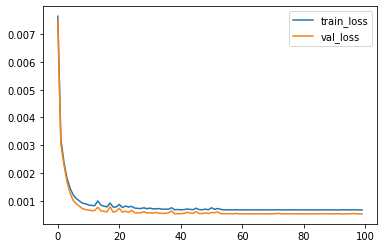

In [47]:
#training model
if args.mode == 'train':
    if args.type == 'daily':
        train_loss_info, val_loss_info = train_daily()
        # training loss trend and validation loss trend
        plt.figure(1)
        plt.plot(train_loss_info, label='train_loss')
        plt.plot(val_loss_info, label='val_loss')
        plt.legend(loc='best')
        plt.show()
    if args.type == 'weekly':
        train_loss_info, val_loss_info = train_weekly()
        # training loss trend and validation loss trend
        plt.figure(1)
        plt.plot(train_loss_info, label='train_loss')
        plt.plot(val_loss_info, label='val_loss')
        plt.legend(loc='best')
        plt.show()

In [48]:
#testing model
if args.mode == 'test':
    if args.type == 'daily':
        trainloader, train_x, train_y, validation_x, validation_y, \
        test_x, test_y, train_x_mean, train_x_std, train_y_mean, train_y_std = dataset_generate_daily()
        # path = 'checkpoint_1.tar'
        path = 'checkpoint_daily.tar'
        test_daily(path, test_x, test_y, train_y_mean, train_y_std)
    if args.type == 'weekly':
        # path = 'checkpoint_2.tar'
        path = 'checkpoint_weekly_sequential.tar'
        trainloader, train_x, train_y, validation_x, validation_y, \
        test_x, test_y, train_x_mean, train_x_std, train_y_mean, train_y_std = dataset_generate()
        test_weekly(path, test_x, test_y, train_y_mean, train_y_std)

In [49]:
# daily_predict_4_day_avg.py
# This part is to predict number of new cases

day_input = 6
timelagging = 6
average_num = 4
feature_num = 14+2*(day_input-1)

def predict_dataset_daily():
    """ 
    read in data and process, this part is very similar to lstm_1.py  
    return:community,data_x,data_x_mean,data_x_std,date_list_new
    """
    # filename = "LA_daily_predict.csv"
    community_daily = LA_daily_predict.copy()
    # pd.read_csv(filename, encoding="ISO-8859-1", dtype={'ZIP': str, 'date': str})
    community = community_daily['ZIP']
    date = community_daily['date']  # we have to preserve the date
    del community_daily['ZIP']
    del community_daily['date']
    community_daily = pd.DataFrame(community_daily, dtype=float)  # change the type from 'int' to 'float'
    community_daily['ZIP'] = community
    community_daily['date'] = date  # add date back

    data_dict = {}  # key: 'community', value: feature that belong to the key
    for i, community in enumerate(community_daily[:]['ZIP']):
        if community not in data_dict:
            data_dict[community] = []
        feature = []
        for f in community_daily.iloc[i]:
            feature.append(f)
        data_dict[community].append(feature)

    community = []  # save 'community' correlating to input point
    date = []     # save 'date' correlating to input point

    data_x = []  # input
    for key, values in data_dict.items():
        l = len(values)
        input_num = l - timelagging - average_num
        feature = []
        input_num=input_num+5
        for i in range(input_num):
            first = True
            for j in range(day_input):
                if first:
                    community.append(values[i][-2])   # save 'community' correlating to ont input point
                    date.append(values[i][-1])      # save 'date' correlating to ont input point
                    # because we add 'date' back, the last feature is values[i][:-5] not values[i][:-4]
                    for k in values[i][:-3]:
                        feature.append(k)
                    first = False
                else:
                    feature.append(values[i + j][0])
                    feature.append(values[i + j][1])
            tmp = []
            tmp.append(feature)
            data_x.append(tmp)  # one input point
            feature = []

    data_x_ls = []
    for j in data_x:
        for i in j:
            data_x_ls.append(i)
    data_x_df = pd.DataFrame(data_x_ls)
    data_x_mean = data_x_df.mean()  # train dataset mean
    data_x_std = data_x_df.std()    # train dataset std

    for i in range(len(data_x)):    # using train_x mean and train_x std to normalize
        for j in range(len(data_x[i])):
            for k in range(len(data_x[i][j])):
                data_x[i][j][k] = (data_x[i][j][k] - data_x_mean[k]) / data_x_std[k]

    data_x = torch.tensor(data_x)

    date_list_new = []
    for date_ in date:
        date_start = (date_+datetime.timedelta(days=6)).strftime("%Y-%m-%d")
        date_end = (date_+datetime.timedelta(days=9)).strftime("%Y-%m-%d")
        date_list_new.append(date_start+' - ' + date_end)
    return community,data_x,data_x_mean,data_x_std,date_list_new

community,data_x,data_x_mean,data_x_std,date_list_new = predict_dataset_daily()

In [50]:
"""     scale the output value back to its original size and cal the loss   """
def upscale(predict,data_x_std,data_x_mean):
    x = predict[:]
    for i in range(len(predict)):
        x[i][0] = x[i][0] * torch.tensor(data_x_std[1]) + torch.tensor(data_x_mean[1])
    return x

"""     define LSTM model   """
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # if batch_first=True, then input shape = (batch, seq, shape)
        self.lstm = torch.nn.LSTM(input_size=feature_num, hidden_size=64, num_layers=1, batch_first=True)
        self.linear = torch.nn.Linear(64 * 1, 32)
        self.linear1 = torch.nn.Linear(32, 1)

    def forward(self, x):
        # print(x.shape)
        x, _ = self.lstm(x)
        x = x.reshape(-1, 64 * 1)
        x = self.linear(x)
        x = self.linear1(x)
        return x


model = Net()
path = 'checkpoint_latest.tar'
# load from file
checkpoint = torch.load(path)
model.load_state_dict(checkpoint['net'])
model.eval()
predict = np.array(model(data_x).data)  # output
predict_upscale = upscale(predict,data_x_std,data_x_mean)      # original scale output

In [51]:
def processOutput(community,date_list_new,predict_upscale):
    """
    Organize the output dataframe
    arg: Region name, Timestamp, Predicted new cases
    return: an output dataframe with risk score
    """
    out = pd.DataFrame()                            # generate table
    out['Region'] = community                            # zip code column
    out['Timestamp'] = date_list_new    # date column
    out['Predicted new cases'] = predict_upscale     # predicted new cases columns
    out['Risk_score_level']=None
    # read population data
    url5="https://raw.githubusercontent.com/skasralikar/Risk-Score-1-UMichZJU/master/data/input/LApopulation.csv"
    pop = pd.read_csv(url5, index_col = False)  # population data
    # calculate the risk score
    # risk score=Predicted new cases*10000/population size
    for i in range(out.shape[0]):
        for j in range(pop.shape[0]):
            if (out.at[i,'Region'] == pop.at[j,'ZIP']):
                out.at[i,'Risk_score'] = 10000 * out.at[i,'Predicted new cases'] / pop.at[j,'population']

    # delete the col 'predicted new cases'
    out=out.drop(columns=['Predicted new cases'])
    # set the first day of predicted period as 'Timestamp'
    for i in range(len(out)):
        out.loc[i,'Timestamp']=out.loc[i,'Timestamp'][0:11]
    return out

def riskScoreLevel(out):
    """
    defind the risk score level
    return: output dataframe with risk score level
    """
    # -1-no data
    # 0-very low level(risk score <=0.1)
    # 1-low level(0.1<risk score <=1)
    # 2-medium level(1<risk score <=2)
    # 3-high level(risk score >2)
    for i in range(len(out)):
        if out['Risk_score'][i]<=0.1:
            out.loc[i,'Risk_score_level']=0
        elif out['Risk_score'][i]<=1:
            out.loc[i,'Risk_score_level']=1
        elif out['Risk_score'][i]<=2:
            out.loc[i,'Risk_score_level']=2
        else:
            out.loc[i,'Risk_score_level']=3
    return out

out0=processOutput(community,date_list_new,predict_upscale)
out=riskScoreLevel(out0)

In [52]:
out.head(10)

,Region,Timestamp,Risk_score_level,Risk_score
0,Acton,2020-04-09,0,-24.587520
1,Acton,2020-04-10,0,-26.030156
2,Acton,2020-04-11,0,-22.628911
3,Acton,2020-04-12,0,-23.349784
4,Acton,2020-04-13,0,-18.503235
5,Acton,2020-04-14,0,-18.058620
6,Acton,2020-04-15,0,-30.371915
7,Acton,2020-04-16,0,-32.020903
8,Acton,2020-04-17,0,-26.015557
9,Acton,2020-04-18,0,-16.875444


In [53]:
#test_output
Aug01=out.loc[out['Timestamp']=='2020-08-01 ']
Aug01.head(10)

,Region,Timestamp,Risk_score_level,Risk_score
109,Acton,2020-08-01,3,24.049134
251,Agoura Hills,2020-08-01,3,40.563168
400,Alhambra,2020-08-01,3,97.892535
546,Altadena,2020-08-01,3,94.688988
695,Arcadia,2020-08-01,3,49.960868
835,Arleta,2020-08-01,3,292.238128
887,Avalon,2020-08-01,0,-65.012227
1026,Azusa,2020-08-01,3,218.980180
1174,Baldwin Hills,2020-08-01,3,127.742886
1308,Baldwin Park,2020-08-01,3,242.552597


In [54]:
out.to_csv('LA-daily-out.csv')